In [2]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
import yfinance as yf

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.ticker import PercentFormatter

[*********************100%***********************]  1 of 1 completed
<ipython-input-39-2b72677f8545>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  preco_hoje = float(petr['Close'].iloc[i])
<ipython-input-39-2b72677f8545>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  preco_ontem = float(petr['Close'].iloc[i - 1])


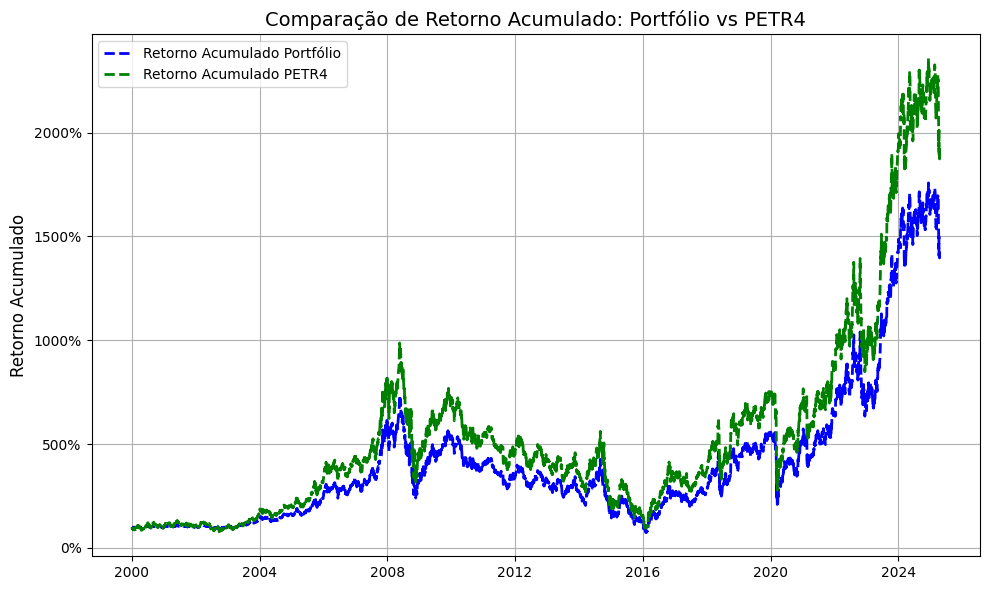

In [39]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Baixando os dados de PETR4
petr = yf.download("PETR4.SA", period='max')

# Inicializando variáveis
caixa = 1000
num_acoes = 0
port_values = []

# Loop para calcular o valor do portfólio ao longo do tempo
for i in range(1, len(petr['Close'])):
    preco_hoje = float(petr['Close'].iloc[i])
    preco_ontem = float(petr['Close'].iloc[i - 1])
    variacao = float(preco_hoje / preco_ontem)

    # Estratégia: vender se subiu mais de 12.5%
    if variacao > 1.125:
        if num_acoes > 5:
            # Vende 5 ações
            caixa += 5 * preco_hoje - (0.005 * 5 * preco_hoje)
            num_acoes -= 5

    # Estratégia: comprar se caiu mais de 5%
    elif variacao < 0.95:
        if caixa >= 20 * preco_hoje + (0.005 * 20 * preco_hoje):
            # Compra 2 ações
            caixa -= 20 * preco_hoje + (0.005 * 20 * preco_hoje)
            num_acoes += 20

    # Valor total do portfólio: caixa + ações
    valor_total = caixa + num_acoes * preco_hoje
    port_values.append(valor_total)

# Convertendo o histórico de portfólio para um DataFrame e calculando o retorno acumulado
port_values_df = pd.DataFrame(port_values)
port_values_df.index = petr.index[1:]  # alinhando com os dados da PETR4
port_values_df_retornos = (1 + port_values_df.pct_change().fillna(0)).cumprod()

# Calculando o retorno acumulado da PETR4
petr_df = pd.DataFrame(petr['Close'])
petr_df['pct_change'] = petr_df['PETR4.SA'].pct_change().fillna(0)
petr_df_retornos = (1 + petr_df['pct_change']).cumprod()

# Plotando os retornos acumulados
plt.figure(figsize=(10, 6))
plt.plot(port_values_df_retornos, label="Retorno Acumulado Portfólio", color='blue', linestyle='--', linewidth=2)
plt.plot(petr_df_retornos, label="Retorno Acumulado PETR4", color='green', linestyle='--', linewidth=2)
plt.title('Comparação de Retorno Acumulado: Portfólio vs PETR4', fontsize=14)
plt.ylabel('Retorno Acumulado', fontsize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-40-0c2d8bd3e5b9>:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  preco_atual = float(dados['Close'].iloc[i])
<ipython-input-40-0c2d8bd3e5b9>:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  preco_anterior = float(dados['Close'].iloc[i - 1])
<ipython-input-40-0c2d8bd3e5b9>:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  preco_atual = float(dados['Close'].iloc[i])
<ipython-input-40-0c2d8bd3e5b9>:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  preco_anterior = float(dados['Close'].iloc[i - 1])
<ipython-input-40-0c2d8bd3e5b9>:29: FutureWarning: Calling float on a single element S

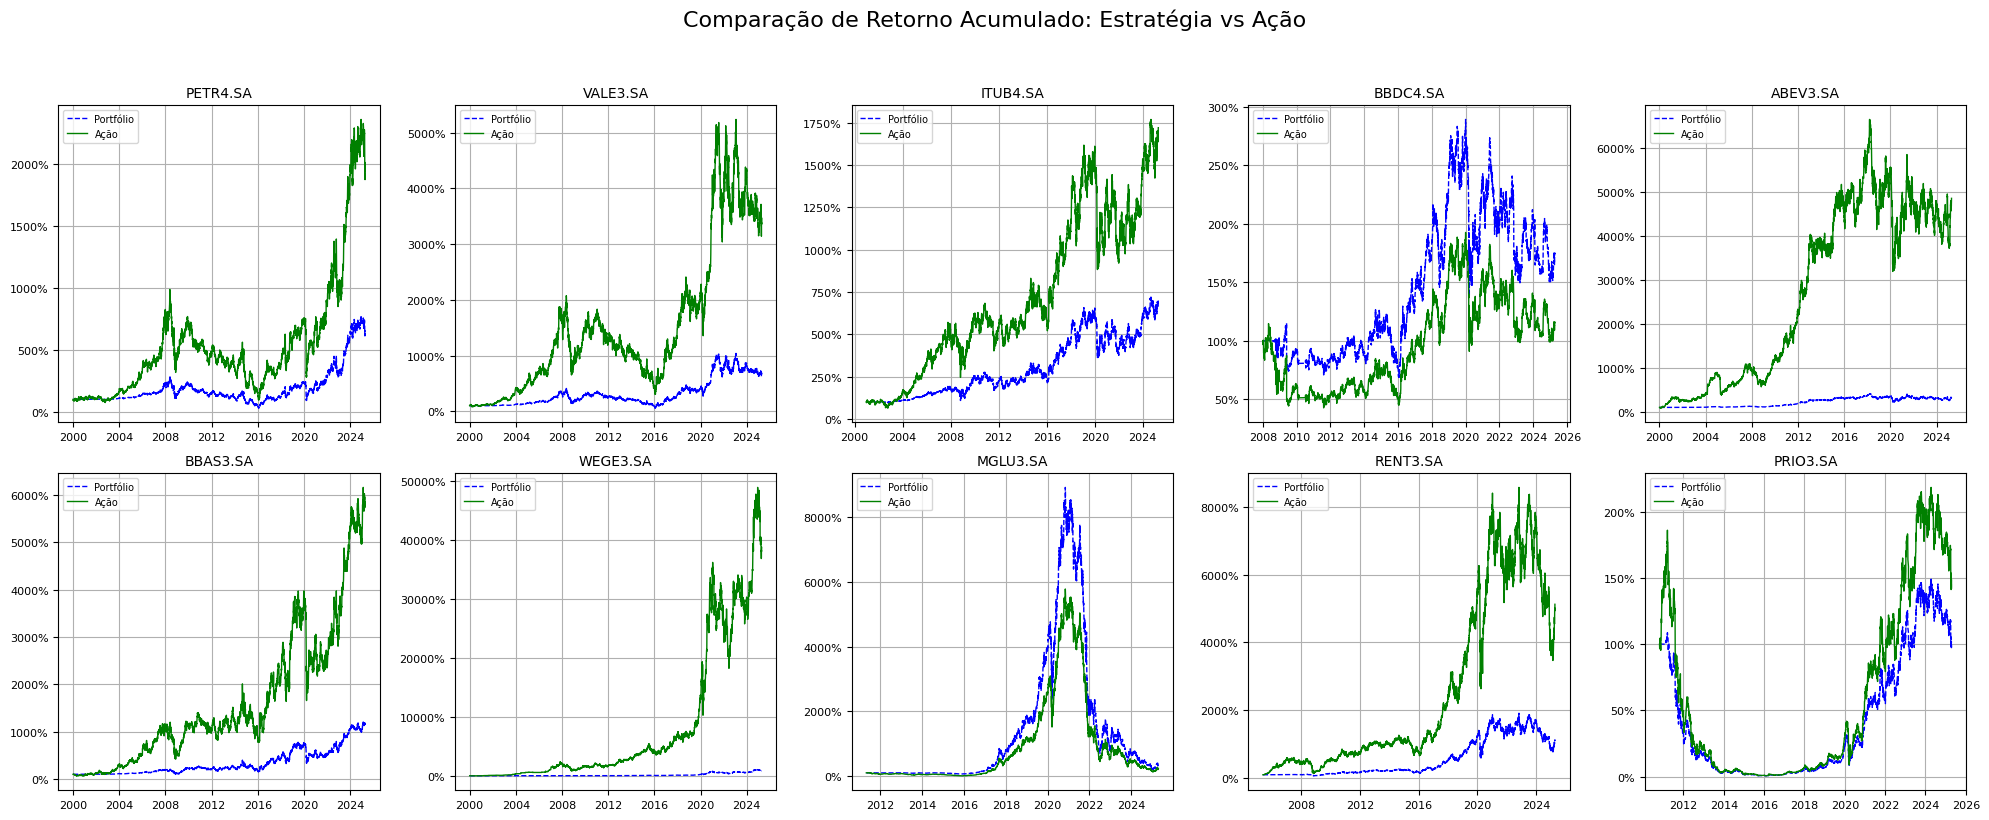

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Lista de ações para aplicar a estratégia
lista_acoes = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "ABEV3.SA",
               "BBAS3.SA", "WEGE3.SA", "MGLU3.SA", "RENT3.SA", "PRIO3.SA"]

# Parâmetros iniciais
port_inicial = 1000

# Criando uma figura única para todos os gráficos
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 linhas, 5 colunas
axs = axs.flatten()  # Facilita iteração com índice

# Loop para cada ativo e gráfico
for idx, ticker in enumerate(lista_acoes):
    # Baixando os dados históricos da ação
    dados = yf.download(ticker, period='max', progress=False)

    # Inicializando variáveis
    caixa = port_inicial
    num_acoes = 0
    port_values = []

    # Estratégia de compra e venda
    for i in range(1, len(dados['Close'])):
        preco_atual = float(dados['Close'].iloc[i])
        preco_anterior = float(dados['Close'].iloc[i - 1])
        variacao = float(preco_atual / preco_anterior)

        # Venda (Estratégia considera também custos para operações com ações na B3)
        if variacao > 1.125:
            if num_acoes > 3:
                caixa += 3 * preco_atual - (0.005 * 3 * preco_atual)
                num_acoes -= 3

        # Compra (Estratégia considera também custos para operações com ações na B3)
        elif variacao < 0.95:
            custo_total = 5 * preco_atual + (0.005 * 5 * preco_atual)
            if caixa >= custo_total:
                caixa -= custo_total
                num_acoes += 5

        # Valor total do portfólio: caixa + valor das ações
        valor_portfolio = caixa + num_acoes * preco_atual
        port_values.append(valor_portfolio)

    # Convertendo os valores do portfólio para DataFrame
    port_df = pd.DataFrame(port_values)
    port_df.index = dados.index[1:len(port_values)+1]  # Alinha os índices com os preços
    port_df_pct = port_df.pct_change().fillna(0)
    port_ret_acumulado = (1 + port_df_pct).cumprod()

    # Retorno acumulado da ação
    dados['pct_change'] = dados['Close'].pct_change().fillna(0)
    retorno_acumulado_acao = (1 + dados['pct_change']).cumprod()

    # Plotando no subplot correspondente
    ax = axs[idx]
    ax.plot(port_ret_acumulado, label='Portfólio', color='blue', linestyle='--', linewidth=1)
    ax.plot(retorno_acumulado_acao, label='Ação', color='green', linestyle='-', linewidth=1)
    ax.set_title(f'{ticker}', fontsize=10)
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.tick_params(labelsize=8)
    ax.grid(True)
    ax.legend(fontsize=7, loc='upper left')

# Ajustando layout
plt.tight_layout()
plt.suptitle("Comparação de Retorno Acumulado: Estratégia vs Ação", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.90)
plt.show()